# Easy
# 104.maximum-depth-of-binary-tree
    Given a binary tree, find its maximum depth.
- 二叉树相关概念、二叉树的遍历
- 引申：BFS（宽度优先搜索算法）和DFS（深度优先搜索算法）
   - BFS：在进一步访问树或图中顶点之前，首先访问当前顶点的所有相邻结点
   - DFS：在搜索过程中访问某个顶点后，需要递归的访问此顶点的所有未访问过的相邻结点
- 题解：
    - 方法一：递归查找，如下
```python
        class node(object):
            def __init__(self, value):
                self.value = value
                self.left = None
                self.right = None        
        def findMaxDepth(treenode):
            if not treenode:
                return 0
            leftDepth = findDepth(treenode.left)
            rightDepth = findDepth(treenode.right)
            return max(leftDepth, rightDepth) + 1
        tree = [3,9,20,None,None,15,7]
        treenode = node(3)
        treenode.left = node(9)
        treenode.right = node(20)
        treenode.right.left = node(15)
        treenode.right.right = node(7) 
        depth = findDepth(treenode)
```
    - 方法二：BFS遍历，如下
    ```python
        def bfsFindMaxDepth(treenode):
            if not treenode:
                return 0
            q = []
            q.append(treenode)
            depth = 0
            while q:
                depth += 1
                size = len(q)
                for i in range(size):
                    curnode = q.pop(0)
                    if curnode.left:
                        q.append(curnode.left)
                    if curnode.right:
                        q.append(curnode.right)
            return depth
        depth = bfsFindMaxDepth(treenode)
    ```
    - 方法三：DFS遍历，如下
    ```python
        def dfsFindMaxDepth(treenode):
            if not treenode:
                return 0
            stack = []
            depth = 0
            stack.append((treenode, 1))
            while stack:
                curnode, curdepth = stack.pop()
                depth = max(depth, curdepth)
                if curnode.left:
                    stack.append((curnode.left, curdepth+1))
                if curnode.right:
                    stack.append((curnode.right, curdepth+1))
            return depth
        depth = dfsFindMaxDepth(treenode)
        depth
    ```

# 121.best-time-to-buy-and-sell-stock
    Say you have an array for which the ith element is the price of a given stock on day i.
    If you were only permitted to complete at most one transaction (buy one and sell one share of the stock), design an algorithm to find the maximum profit.
    Note that you cannot sell a stock before you buy one.
   - 题目分析：列表中为每天的价格，只能交易一次，不能先卖后买，求一次交易的最大利润。
   - 题解：遍历列表，记录当前的最低价和最大利润，如果当前价格低于最低价格，更新最低价格；如果当前利润大于最大利润，更新最大利润。
   ```python
        def findMaxProfit(prices):
            maxprofit = 0
            minprice = prices[0]
            for i in prices:
                minprice = min(minprice, i)
                if i > minprice:
                    maxprofit = max(maxprofit, i-minprice)
            return maxprofit
        prices = [7,6,4,3,1]
        maxprofit = findMaxProfit(prices)
```

# 122.best-time-to-buy-and-sell-stock-ii
    Say you have an array for which the ith element is the price of a given stock on day i.
    Design an algorithm to find the maximum profit. You may complete as many transactions as you like (buy one and sell one share of the stock multiple times).
    Note: You may not engage in multiple transactions at the same time (i.e., you must sell the stock before you buy again).
  - 题目解析：列表中为每天的价格，不限交易次数，不能连续买入，求交易的最大利润。
  - 题解：因为不限交易次数，所以每次赚钱的机会都不放过，每次都是低点买入，高点卖出，利润总和即为最大利润。
  ```python
        def findMaxProfit(prices):
            maxprofit = 0
            for i in range(1, len(prices)):
                if prices[i] > prices[i-1]:
                    maxprofit += prices[i] - prices[i-1]
            return maxprofit
        prices = [1,2,1,3,4,5]
        maxprofit = findMaxProfit(prices)
```

# 125.valid-palindrome
    Given a string, determine if it is a palindrome, considering only alphanumeric characters and ignoring cases.
    Note: For the purpose of this problem, we define empty string as valid palindrome.
   - 题目解析：判断字符串是否为回文字符串，只考虑字母或数字，其它字符忽略
   - 题解：双指针遍历
   ```python
        import re  
        def isPalindrome(s):
            pattern = '[0-9a-zA-Z]'
            s = s.lower() # 注意：该方法不改变原字符串
            if not s:
                return True
            left = 0
            right = len(s)-1
            while right >= left:
                if not re.match(pattern, s[left]):
                    left += 1
                    continue
                if not re.match(pattern, s[right]):
                    right -= 1
                    continue
                if s[left] != s[right]:
                    return False
                right -= 1
                left += 1
            return True
        s = 'lA man, a plan , a canal: Pa nama'
        res = isPalindrome(s)
```

# 136.single-number
    Given a non-empty array of integers, every element appears twice except for one. Find that single one.
    Note:Your algorithm should have a linear runtime complexity. Could you implement it without using extra memory?
   - 题目解析：给一个非空整数数组，除了一个元素外，其它所有元素都出现两次，找到这个出现一次的元素。要求时间复杂度为O(n)，空间复杂度O(1)。
   - 题解：利于按二进制位异或思想，重复的元素按位异或最终会是0，最终所有元素按位求异或后剩下的值就是出现一次的元素。
```python
        def find_single_number(num_array):
            res = 0
            for i in num_array:
                res = res ^ i
            return res

        arr = [1, 2, 6, 2, 1]
        res = find_single_number(arr)
```
   - 延伸：如果改成有两个元素出现一次，如何找出这两个元素？依然要求时间复杂度为O(n)，空间复杂度O(1)。
   - 题解：第一遍按位异或求的值为两个只出现一次的元素求异或的值，这个值一定不是0，即一定在某个二进制位上是1；然后用该二进制位为1其它位都为0的数与数组中的所有元素求与，值为0的数一组，值为1的数一组。这样就把问题分解成两个single-number问题。
```python
        def find_single_numberEx(num_array):
            res1 = 0
            dev = 1
            for i in num_array:
                res1 = res1 ^ i
            while not res1 & dev:
                dev <<= 1       
            res1 = 0
            res2 = 0
            for i in num_array:
                if i & dev:
                    res2 = res2 ^ i
                else:
                    res1 = res1 ^ i
            return res1, res2
        arr = [1, 2, 3, 4, 3, 1, 4, 6]
        res = find_single_numberEx(arr)
```

# 155.min-stack
    Design a stack that supports push, pop, top, and retrieving the minimum element in constant time.
    push(x) -- Push element x onto stack.
    pop() -- Removes the element on top of the stack.
    top() -- Get the top element.
    getMin() -- Retrieve the minimum element in the stack.
    Example:
    MinStack minStack = new MinStack();
    minStack.push(-2);
    minStack.push(0);
    minStack.push(-3);
    minStack.getMin();   --> Returns -3.
    minStack.pop();
    minStack.top();      --> Returns 0.
    minStack.getMin();   --> Returns -2.
   - 题目解析：设计一个栈，并实现push()、pop()、top()、getMin()方法，且每个方法的时间复杂度都为O(1)。
   - 题解：
       - 思路一：空间换时间，利用两个栈，一个用来存储数据，另一个用来存储当前数据栈中的最小值，两个栈操作同步。
       - 思路二：要想用一个栈实现题目的效果，那么栈中不能存储数据，而是存储与当前最小值的差值，用一个单独变量存储当前栈中的最小值，差值为负数时更新最小值变量；此时唯一的问题是当前最小值出栈时如何找到上一个最小值，其实只要用当前最小值减去当前的差值（负数）即可。其原理是：如果出栈的数为一个大于等于0的数，表示这个数据入栈时对最小值没有影响，它的值等于最小值+出栈值；如果出栈的数为一个负数，表示这个数据入栈时比当时的最小值小，更新了最小值，那么当时的最小值=当前最小值-出栈值。
   - 思路一：
```python
        class MinStack(object):
            def __init__(self):
                self.stack = []
                self.minstack = []
                self.min = None
            def push(self, val):
                if not self.min:
                    self.min = val
                self.stack.append(val)
                if self.min > val:
                    self.min = val
                self.minstack.append(self.min)
            def top(self):
                return self.stack[-1]
            def pop(self):
                self.minstack.pop()
                self.min = self.minstack[-1]
                return self.stack.pop()
            def getMin(self):
                return self.min
```
   - 思路二：
```python
        class MinStack(object):
            def __init__(self):
                self.stack = []
                self.min = None
            def push(self, val):
                if not self.stack:
                    self.min = val
                dif = val-self.min
                self.stack.append(dif)
                if dif < 0:
                    self.min = val
            def top(self):
                dif = self.stack[-1]
                return dif + self.min
            def pop(self):
                dif = self.stack.pop()
                min = self.min
                if dif < 0:
                    self.min -= dif 
                return dif + min
            def getMin(self):
                return self.min
```

# 167.two-sum-ii-input-array-is-sorted
    Given an array of integers that is already sorted in ascending order, find two numbers such that they add up to a specific target number.
    The function twoSum should return indices of the two numbers such that they add up to the target, where index1 must be less than index2.
    Note:
        Your returned answers (both index1 and index2) are not zero-based.
        You may assume that each input would have exactly one solution and you may not use the same element twice.
    Example:
        Input: numbers = [2,7,11,15], target = 9
        Output: [1,2]
        Explanation: The sum of 2 and 7 is 9. Therefore index1 = 1, index2 = 2.
   - 题目解析：给定一个整型数组，元素升序排列，找出相加的和为指定值的两个元素的索引。注意数组只有唯一解，元素不能用两次，返回结果的索引从1开始。
   - 题解：
       - 思路一：因为题目对空间复杂度没有要求，所以可使用哈希表求解，依次遍历数组，将遍历到的元素以值：索引的形式存入哈希表，并判断目标和-当前遍历值的查值的key是否存在即可。
       - 思路二：如果要求空间复杂度为O(1),那么使用双指针来解本题,如果左右之和大于目标值，有指针左移；反之，左指针右移。 
   - 思路一：
```python
        def twoSum(arr, target):
            d = {}
            for index,value in enumerate(arr):
                d[str(value)] = index + 1
                if str(target - value) in d:
                    return d[str(target - value)], index + 1
            return None
        arr = [2,7,11,15]
        res = twoSum(arr, 13)
```
   - 思路二：
```python
        def twoSum(arr, target):
            left = 0
            right = len(arr) - 1
            while left < right:
                if arr[left] + arr[right] > target:
                    right -= 1
                    continue
                if arr[left] + arr[right] < target:
                    left += 1
                    continue
                return left + 1, right + 1
            return None
        arr = [2,7,11,15]
        res = twoSum(arr, 18)
```

# 172.factorial-trailing-zeroes
    Given an integer n, return the number of trailing zeroes in n!.
    Example 1:
    Input: 3
    Output: 0
    Explanation: 3! = 6, no trailing zero.
    Example 2:
    Input: 5
    Output: 1
    Explanation: 5! = 120, one trailing zero.
    Note: Your solution should be in logarithmic time complexity.
   - 题目解析：给一个整数n，计算出该整数的阶乘有多少个末尾的0，要求算法的时间复杂度为n的对数。
   - 题解：因为要求时间复杂度为n的对数，所以不能暴力求解。通过因式分解思想可知，只有质因数2和5相乘，才会在结果末尾得到一个0；而任何一个数的阶乘的质因数中，2的个数明显多于5的个数，所以此题可转化为求一个数的阶乘的因式分解中5的个数。通过找规律可以得到一个数X的阶乘的因式分解中5的个数为X/5 + X/5^2 + X/5^3 + ...。
```python
        def factorialTrailZeros(n):
            div = 5
            res = 0
            while n // div > 0:
                res += n // div
                div *= 5
            return res
        res = factorialTrailZeros(25)
```

# 169.majority-element
    Given an array of size n, find the majority element. The majority element is the element that appears more than ⌊ n/2 ⌋ times.
    You may assume that the array is non-empty and the majority element always exist in the array.
    Example 1:
    Input: [3,2,3]
    Output: 3
    Example 2:
    Input: [2,2,1,1,1,2,2]
    Output: 2
   - 题目解析：给点一个大小为n的数组，找出其中重复次数最多的元素（出现次数大于n/2）。给点数组不为空且目标元素一定存在。
   - 题解：
       - 思路一：普通方法是利用额外的空间存储元素出现的次数，并记录当前出现次数做多的元素，遍历一遍数组，找出出现次数最多的元素。
       - 思路二：因为目标元素出现次数大于n/2的设定，可使用投票算法，不断消除数组中两两不同的元素，直到没有不同的元素，则剩下的元素即为目标元素。假设目标元素出现次数为m，则消除后剩下的最小元素个数为m-（n-m）> 0，即该算法的使用条件为m > n/2。
   - 思路二：
```python
        def majority_element(arr):
            count = 0
            for i in arr:
                if count == 0:
                    majority = i
                    continue
                if i == majority:
                    count += 1
                    continue
                if i != majority:
                    count -= 1
            return majority
        arr = [2,2,1,1,1,2,2]
        res = majority_element(arr)
```

# 190.reverse-bits
    Reverse bits of a given 32 bits unsigned integer.
    Example 1:
    Input: 00000010100101000001111010011100
    Output: 00111001011110000010100101000000
    Explanation: The input binary string 00000010100101000001111010011100 represents the unsigned integer 43261596, so return 964176192 which its binary representation is 00111001011110000010100101000000.
    Example 2:
    Input: 11111111111111111111111111111101
    Output: 10111111111111111111111111111111
    Explanation: The input binary string 11111111111111111111111111111101 represents the unsigned integer 4294967293, so return 3221225471 which its binary representation is 10101111110010110010011101101001.
   - 题目解析：按位翻转无符号整数（不是字符串翻转）
   - 题解：涉及到位运算，通常都离不开位操作符。可利用位移思想，输入值右移，相当于输入值按位从右往左遍历；输出值左移，相当于按位从左往右遍历。在位移的过程中，通过按位与1进行运算，可调整每一位的值；32位整数，则进行32次位移操作即可。
```python
        def reverse_bits(n):
            res = 0
            for i in range(32):
                res = (res << 1) + (n & 1)
                n >>= 1
            return res
        res = reverse_bits(43261596)
```

# 191.number-of-1-bits
    Write a function that takes an unsigned integer and return the number of '1' bits it has (also known as the Hamming weight).
    Example 1:
    Input: 00000000000000000000000000001011
    Output: 3
    Explanation: The input binary string 00000000000000000000000000001011 has a total of three '1' bits.
    Example 2:
    Input: 00000000000000000000000010000000
    Output: 1
    Explanation: The input binary string 00000000000000000000000010000000 has a total of one '1' bit.
    Example 3:
    Input: 11111111111111111111111111111101
    Output: 31
    Explanation: The input binary string 11111111111111111111111111111101 has a total of thirty one '1' bits.
    Note:
    Note that in some languages such as Java, there is no unsigned integer type. In this case, the input will be given as signed integer type and should not affect your implementation, as the internal binary representation of the integer is the same whether it is signed or unsigned.
    In Java, the compiler represents the signed integers using 2's complement notation. Therefore, in Example 3 above the input represents the signed integer -3.
   - 题目解析：给一个无符号整数，求该整数二进制1的个数。
   - 题解：
       - 思路一：常规思路是从1开始求与，循环，每循环一次，1向左位移一位，记录每次结果位1的个数；但是本题没有给出整数的位数，因此无法判断循环多少次结束，所以这种方法不适合。
       - 思路二：这里用到一个技巧，n & (n-1)可以消掉n末位的1，利用这个特性，另n = n & (n-1)直到n = 0,循环次数即为n中二进制1的位数。
   - 思路二：
```python
        def numberOf1Bits(n):
            count = 0
            while n:
                count += 1
                n = n & (n-1)
            return count
        res = numberOf1Bits(9)
```
   - 扩展：可以通过二进制强转的方式，即将输入的无符号整数转化成二进制字符串，来计算1的个数。
```python
        def num2bitstr(n):
            stack = []
            while n:
                if n % 2 > 0:
                    stack.insert(0, '1')
                else:
                    stack.insert(0, '0')
                n = n // 2
            return ''.join(stack)
        res = num2bitstr(256)
```

# 70. Climbing Stairs
    You are climbing a stair case. It takes n steps to reach to the top.
    Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?
    Note: Given n will be a positive integer.
    Example 1:
    Input: 2
    Output: 2
    Explanation: There are two ways to climb to the top.
    1. 1 step + 1 step
    2. 2 steps
    Example 2:
    Input: 3
    Output: 3
    Explanation: There are three ways to climb to the top.
    1. 1 step + 1 step + 1 step
    2. 1 step + 2 steps
    3. 2 steps + 1 step
   - 题目解析：假设你在爬楼梯，每次只能上一步或两步，求上一个N阶楼梯，有多少种爬法。
   - 引申：动态规划（dynamic programming）问题，这类问题的一般思路：
       - 判断问题的子结构（也可看作状态），当具有最优子结构时，动态规划可能适用。
       - 求解重叠子问题。一个递归算法不断地调用同一问题，递归可以转化为查表从而利用子问题的解。分治法则不同，每次递归都产生新的问题。
       - 重新构造一个最优解。
   - 题解：假设n阶楼梯的爬法有f(n)种，由题目可知，最后一步要么上两阶，要么上一阶，即f(n)=f(n-1)+f(n-2)，这是一个斐波那契数列。
```python
        def climbStairs(n):
            if n == 1:
                return 1
            if n == 2:
                return 2
            if n > 2:
                return climbStairs(n-1) + climbStairs(n-2)
        res = climbStairs(4)
```
   - 使用循环对递归进行优化：
```python
        def climbStairs(n):
            if n == 1 or n == 2:
                return n
            subtract1 = 2
            subtract2 = 1
            i = 3
            while i <= n:
                res = subtract1 + subtract2
                i += 1 
                subtract2 = subtract1
                subtract1 = res
            return res  
        res = climbStairs(5)
```

# 198.house-robber
    You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security system connected and it will automatically contact the police if two adjacent houses were broken into on the same night.
    Given a list of non-negative integers representing the amount of money of each house, determine the maximum amount of money you can rob tonight without alerting the police.
    Example 1:
    Input: [1,2,3,1]
    Output: 4
    Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
                 Total amount you can rob = 1 + 3 = 4.
    Example 2:
    Input: [2,7,9,3,1]
    Output: 12
    Explanation: Rob house 1 (money = 2), rob house 3 (money = 9) and rob house 5 (money = 1).
                 Total amount you can rob = 2 + 9 + 1 = 12.
   - 题目解析：假设你是一个强盗沿街抢劫，每个房子内的钱财固定，唯一的限制是不能抢劫两个相邻的房子，否则会触发报警。设计一种算法，求能抢劫的最大钱财数量而不触发报警。
   - 题解：动态规划问题，利用递归求解。
```python
        def houseRobber(arr):
            if len(arr) == 1:
                return arr[0]
            if len(arr) == 2:
                return max(arr[0], arr[1])
            if len(arr) == 3:
                return max(arr[0] + arr[2], arr[1])
            if len(arr) == 4:
                return max(arr[0] + arr[2], arr[1] + arr[3])
            res1 = arr[0] + houseRobber(arr[2:])
            res2 = arr[1] + houseRobber(arr[3:])
            return max(res1, res2)
        arr = [2,7,9,3,1,3,2,5]
        res = houseRobber(arr)
```
   - 循环优化：对于n个成员的数组arr，抢到索引为i的成员时能抢劫的最大钱财f(i)=max(f(i-2)+arr[i], f(i-1))，找出问题的子结构将问题转化成数学模型，是解决动态规划问题的重要且基本的方法。
```python
        def houseRobber(arr):
            length = len(arr)
            if length == 1:
                return arr[0]
            if length == 2:
                return max(arr[0], arr[1])
            i = 2
            subtract1 = max(arr[0], arr[1])
            subtract2 = arr[0]
            while i <= length - 1:
                res = max(subtract1, subtract2 + arr[i])
                i += 1
                subtract2 = subtract1
                subtract1 = res
            return res
        arr = [2,7,9,3,1,7,3,3]
        res = houseRobber(arr)
```

# 219.contains-duplicate-ii
    Given an array of integers and an integer k, find out whether there are two distinct indices i and j in the array such that nums[i] = nums[j] and the absolute difference between i and j is at most k.
    Example 1:
    Input: nums = [1,2,3,1], k = 3
    Output: true
    Example 2:
    Input: nums = [1,0,1,1], k = 1
    Output: true
    Example 3:
    Input: nums = [1,2,3,1,2,3], k = 2
    Output: false
   - 题目解析：给定一个整数数组和一个整数k，找出数组中是否存在值相等的两个不同的切片索引，且两个索引的差值最大为k。
   - 题解：
       - 思路一：遍历数组，对于索引i，判断索引[i+1, i+k]区间内是否存在与索引i相同的值即可，注意边界条件。
       - 思路二：因为没有限制空间复杂度，所以可以借助哈希表，记录遍历过的元素，进行查找,如果遇到值重复的，但索引差不满足要求，更新哈希表中的索引值为当前索引。
   - 思路一：
```python
        def containsDuplicate(arr, k):
            if len(arr) < 2:
                return False
            for i in range(len(arr)-1):
                value = arr[i]
                for j in range(k):
                    if (i+1+j) < len(arr):
                        if arr[i+1+j] == value:
                            return True
                    else:
                        break
            return False
        arr = [1,2,3,1,2,3]
        k = 2
        res = containsDuplicate(arr, k)
```
   - 思路二：
```python
        def containsDuplicate(arr, k):
            d = {}
            for index, val in enumerate(arr):
                if val in d and (index - d[val]) <= k:
                    return True
                d[val] = index
            return False
        arr = [1,2,3,1,2,3]
        k = 3
        res = containsDuplicate(arr, k)
```

# 263.ugly-number
    Write a program to check whether a given number is an ugly number.
    Ugly numbers are positive numbers whose prime factors only include 2, 3, 5.
    Example 1:
    Input: 6
    Output: true
    Explanation: 6 = 2 × 3
    Example 2:
    Input: 8
    Output: true
    Explanation: 8 = 2 × 2 × 2
    Example 3:
    Input: 14
    Output: false 
    Explanation: 14 is not ugly since it includes another prime factor 7.
    Note:
    1 is typically treated as an ugly number.
    Input is within the 32-bit signed integer range: [−231,  231 − 1].
   - 题目解析：判断一个整数是不是“丑陋数”，即因式分解后只包含质因子2，3，5的正数。
   - 题解：以2，3，5为因子，顺序无所谓，不断对给定数进行因式分解，直到不能整除，最后得到值1，则是“丑陋数”。
```python
        def uglyNumber(x):
            if x <= 1:
                return False
            while x > 1:
                if x % 2 == 0:
                    x = x / 2
                    continue
                if x % 3 == 0:
                    x = x / 3
                    continue
                if x % 5 == 0:
                    x = x / 5
                    continue
                return False
            return True
        res = uglyNumber(14)
```

# 283.move-zeroes
    Given an array nums, write a function to move all 0's to the end of it while maintaining the relative order of the non-zero elements.
    Example:
    Input: [0,1,0,3,12]
    Output: [1,3,12,0,0]
    Note:
    You must do this in-place without making a copy of the array.
    Minimize the total number of operations.
   - 题目解析:给定一个整数数组，将所有0元素移到数组的末尾，并保持非0元素的相对顺序不变，不能借助额外内存，并尽量减少元素的操作次数。
   - 题解：用一个游标记录上一个非0元素的索引位置，遍历数组元素，按游标逐个更新数组元素位非0元素，遍历结束后将游标位置之后知道数组末尾的元素置0即可。
```python
        def moveZeroes(arr):
            index = 0
            for i in arr:
                if i:
                    arr[index] = i
                    index += 1
            while index < len(arr):
                arr[index] = 0
                index += 1
            return arr
        arr = [0,1,0,3,12]
        res = moveZeroes(arr)
```

# 342.power-of-four
    Given an integer (signed 32 bits), write a function to check whether it is a power of 4.
    Example 1:
    Input: 16
    Output: true
    Example 2:
    Input: 5
    Output: false
    Follow up: Could you solve it without loops/recursion?
   - 题目解析：给一个32位整数，判断是否是4的幂整数。不能使用循环和递归。
   - 题解：由于不能用循环和递归，考虑位运算。分析可知，4的幂整数的二进制形式为类如“1000”或“100000”这种，即只有一个“1”，其余位都是“0”，且“1”一定在除了第一位以外的奇数位上。把问题分解：4的幂整数一定也是2的幂整数；2的幂整数的二进制形式同样只有一个“1”，其余位都是“0”；2的幂整数的“1”可能在奇数位上，也可能在偶数位上。那么可得，如果一个数是2的幂整数，且“1”不在偶数位上，那么这个数一定是4的幂整数。2的幂整数有一个性质，即n & (n-1)一定为0，如此可判断一个数是2的幂整数；将该2的幂整数与一个特殊的数，即二进制偶数位为1，其余位为0的数按位求与，如果结果为0，可知该2的幂整数的“1”一定在奇数位上，那么它一定是4的幂整数。
```python
        def powerOfFour(x):
            # 最高位是符号位，这里不用考虑，所以给0
            n = '00101010101010101010101010101010'
            nn = int(n, 2)
            if not (x & (x-1)):
                if not (x & nn):
                    return True
            return False
        res = powerOfFour(68)
```

# 349.intersection-of-two-arrays
    Given two arrays, write a function to compute their intersection.
    Example 1:
    Input: nums1 = [1,2,2,1], nums2 = [2,2]
    Output: [2]
    Example 2:
    Input: nums1 = [4,9,5], nums2 = [9,4,9,8,4]
    Output: [9,4]
    Note:
    Each element in the result must be unique.
    The result can be in any order.
   - 题目解析：给定两个数组，计算这个两个数组的交集并返回。交集中的元素不能重复，无序。
   - 题解：由于对额外内存没有限制，可使用集合操作。
```python
        def intersectionOfTwoArr(arr1, arr2):
            set1 = set(arr1)
            set2 = set(arr2)
            return list(set1 & set2)
        arr1 = [4,9,5]
        arr2 = [9,4,9,8,4]
        res = intersectionOfTwoArr(arr1, arr2)
```

# 371.sum-of-two-integers
    Calculate the sum of two integers a and b, but you are not allowed to use the operator + and -.
    Example 1:
    Input: a = 1, b = 2
    Output: 3
    Example 2:
    Input: a = -2, b = 3
    Output: 1
   - 题目解析：计算两个整数的和，不能使用操作符“+”和“-”。
   - 题解：使用位运算，根据异或运算符的性质，相同为0，不同为1，可以将异或运算看作不进位的加法；根据与运算的性质，只有两个1求与结果才为1，因此将两个数求与后左移一位，可以看作只进位，不留余数的加法。将两个操作的结果加起来，就是完整的加法运算，使用递归求解。
```python
        def sumOfTwoIntegers(a, b):
            stack = []
            stack.append((a, b))
            while stack:
                a, b = stack.pop()
                if a == 0:
                    return b
                if b == 0:
                    return a
                # 因为python整数不会溢出，所以需要对相加的两个数对0x100000000进行取模，保证其小于32位，防止无限循环或递归
                m = (a ^ b) % 0x100000000
                carry = (a & b) << 1
                n = carry % 0x100000000
                stack.append((m, n))
        res = sumOfTwoIntegers(3, -3)
```

# 575.distribute-candies
    Given an integer array with even length, where different numbers in this array represent different kinds of candies. Each number means one candy of the corresponding kind. You need to distribute these candies equally in number to brother and sister. Return the maximum number of kinds of candies the sister could gain.
    Example 1:
    Input: candies = [1,1,2,2,3,3]
    Output: 3
    Explanation:
    There are three different kinds of candies (1, 2 and 3), and two candies for each kind.
    Optimal distribution: The sister has candies [1,2,3] and the brother has candies [1,2,3], too. 
    The sister has three different kinds of candies. 
    Example 2:
    Input: candies = [1,1,2,3]
    Output: 2
    Explanation: For example, the sister has candies [2,3] and the brother has candies [1,1]. 
    The sister has two different kinds of candies, the brother has only one kind of candies. 
    Note:
    The length of the given array is in range [2, 10,000], and will be even.
    The number in given array is in range [-100,000, 100,000].
   - 题目解析：给定一个成员个数为偶数的数组，平均分成两份，求其中一份能分到的成员值互不相同的最大成员个数。
   - 题解：假设数组大小为n，如果数组中值互不相同的成员个数大于n/2，那么结果就是n/2；如果小于n/2，那么结果就是互不相同的成员总数。
```python
        def distributeCandies(arr):
            n = len(arr) // 2
            s = set(arr)
            if len(s) > n:
                return n
            else:
                return len(s)
        arr = [-1,-1,-1,-1000,-1,-1000]
        res = distributeCandies(arr)
```

# Medium
# 2.addTwoNumbers
    You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order and each of their nodes contain a single digit. Add the two numbers and return it as a linked list.
    You may assume the two numbers do not contain any leading zero, except the number 0 itself.
    Example
    Input: (2 -> 4 -> 3) + (5 -> 6 -> 4)
    Output: 7 -> 0 -> 8
    Explanation: 342 + 465 = 807.
   - 题目解析：给定两个非空链表，每个节点中包含一个非负数，整个链表代表一个倒叙的整数，求这个两个链表表示的整数的和。
   - 题解：从头遍历两个链表元素，定义一个进位标志位，每一位的和等于两个元素及进位标志位的和，如果大于9，则该位最终的值为对10取余的值，同时将进位标志位置1。注意边界条件处理和标志位复位。
```python
        def addTwoNumbers(arr1, arr2):
            index, tmp = (0, 0)
            res = []
            length1 = len(arr1)
            length2 = len(arr2)
            while index < max(length1, length2):
                if index >= length1:
                    sum_num = 0 + arr2[index] + tmp
                elif index >= length2:
                    sum_num = 0 + arr1[index] + tmp
                else:
                    sum_num = arr1[index] + arr2[index] + tmp
                tmp = 0
                if sum_num > 9:
                    sum_num = sum_num % 10
                    tmp = 1
                res.append(sum_num)
                index += 1
            if tmp == 1:
                res.append(1)
            return res
        arr1 = [2, 5, 3]
        arr2 = [3, 6, 6]
        res = addTwoNumbers(arr1, arr2)
```

# 3.longestSubstringWithoutRepeatingCharacters
    Given a string, find the length of the longest substring without repeating characters.
    Examples:
    Given "abcabcbb", the answer is "abc", which the length is 3.
    Given "bbbbb", the answer is "b", with the length of 1.
    Given "pwwkew", the answer is "wke", with the length of 3. Note that the answer must be a substring, "pwke" is a subsequence and not a substring.
   - 题目解析：给定一个字符串，找出最长不重复子串
   - 题解：滑动窗口思想，左边界从字符串第一个字符开始，右边界从左边界开始（初始位置与左边界重合）逐渐右移，使用一个集合记录右边界遍历到的值，只要右边界的值没出现过，那么加入集合，右边界右移动，直到右边界的值在集合中已存在，当前最长子串的索引区间为[左边界:右边界]（左闭右开）；清空集合，左边界右移一位，右边界再次从左边界开始逐渐右移，循环这个过程，直到左边界的位置到字符串末尾的长度小于当前最长子串的长度。
```python
        def longestSubstringWithoutRepeatingCharacters(s):
            res = ''
            stat = 0
            st = set()
            while len(s) - stat > len(res):
                for i in range(stat, len(s)):
                    if s[i] in st:
                        if i - stat > len(res):
                            res = s[stat:i]
                        break
                    st.add(s[i])
                st.clear()
                stat += 1
            return res

        s = 'bbbb'
        a = longestSubstringWithoutRepeatingCharacters(s)
```

# 5.longest-palindromic-substring
    Given a string s, find the longest palindromic substring in s. You may assume that the maximum length of s is 1000.
    Example 1:
    Input: "babad"
    Output: "bab"
    Note: "aba" is also a valid answer.
    Example 2:
    Input: "cbbd"
    Output: "bb"
   - 题目解析：给定一个字符串，找出其最长回文子串
   - 题解：回文子串有两种，一种是偶数个字符，一种是奇数个字符，要注意区分。利用动态规划思想，找出大问题相关联的小问题，然后“延伸”。动态规划的dp数组的本质是要记住所有的子问题结果（消耗空间），然后逐层延伸出的大问题在小问题结果的基础上求解。回到本题求最长回文，通过固定一个边界base，“延伸”另一个边界，判断它是不是回文，并用dp数组记录。核心思想是如果一个子串是回文，那么在它左右各加上一个字符，如果新加的两个字符相等，那么新子串一定是回文。
```python
        def longest_palindromic_substring(s):
            if not s:
                return None
            res = s[0]
            base = len(s) - 1
            dp = [None for i in range(len(s))]
            step = base
            while base >= 0:
                dp[base] = [False for i in range(len(s))]
                for step in range(base, len(s)):
                    if step == base:
                        dp[base][step] = True
                    if step == base + 1 and s[base] == s[step]:
                        dp[base][step] = True
                    if step > base + 1 and s[base] == s[step] and dp[base+1][step-1]:
                        dp[base][step] = True
                    if dp[base][step] and (step+1-base) > len(res):
                        res = s[base:step+1]
                base -= 1
            return res
        s = "abbabcba"
        res = longest_palindromic_substring(s)
```

# 11.container-with-most-water
    Given n non-negative integers a1, a2, ..., an , where each represents a point at coordinate (i, ai). n vertical lines are drawn such that the two endpoints of line i is at (i, ai) and (i, 0). Find two lines, which together with x-axis forms a container, such that the container contains the most water.
    Note: You may not slant the container and n is at least 2.
    The below vertical lines are represented by array [1,8,6,2,5,4,8,3,7]. In this case, the max area of water (blue section) the container can contain is 49.
    Example:
    Input: [1,8,6,2,5,4,8,3,7]
    Output: 49
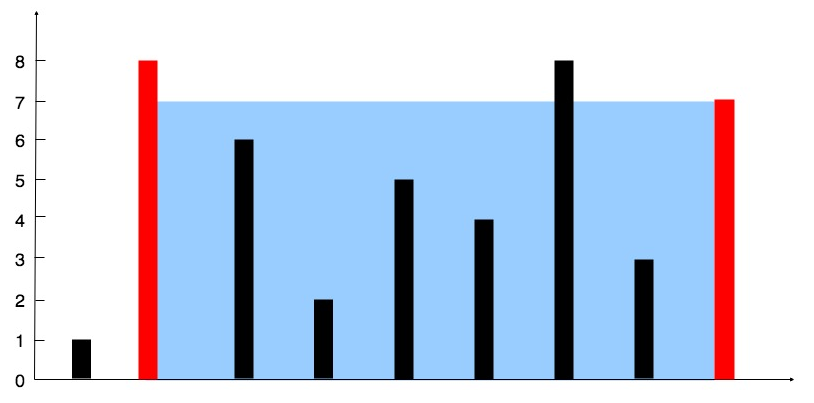
   - 题目解析：给一个非负整型数组，整数的值表示垂直高度，索引差表示宽度，求最大蓄水量。
   - 题解：
       - 常规思路：两两成员之间相互求解，更新最大面积。需要两层循环，时间复杂度O(n^2)
       - 优化思路：使用左右指针，从左右两个边界开始逐渐缩小宽度；每次移动可以减小一倍的计算量，因为每次移动只需要移动高度较小的指针即可。例如求宽度为n-1的情况时，不需要[0:n-1]和[1:n]两个都计算，如果左指针的高度小于右指针，那么只求[1:n]的面积即可，它必然大于[0:n-1]，因为蓄水量取决于高度小的那个边。
```python
        def container_with_most_water(s):
            left = 0
            right = len(s) - 1
            res = 0
            while left < right:
                if s[left] < s[right]:
                    h = s[left]
                    capacity = (right - left) * h
                    left += 1
                else:
                    h = s[right]
                    capacity = (right - left) * h
                    right -= 1
                res = max(res, capacity)
            return res
        s = [1,8,6,2,5,4,8,3,7]
        res = container_with_most_water(s)
```

# 15.3-sum
    Given an array nums of n integers, are there elements a, b, c in nums such that a + b + c = 0? Find all unique triplets in the array which gives the sum of zero.
    Note:
    The solution set must not contain duplicate triplets.
    Example:
    Given array nums = [-1, 0, 1, 2, -1, -4],
    A solution set is:
    [
      [-1, 0, 1],
      [-1, -1, 2]
    ]
   - 题目解析：给定一个整数数组，找出所有不重复的三数相加等于0的组合。
   - 题解：通过依次遍历数组，将问题转化为给定一个数组，找出两数相加等于给定值的问题。而这类问题通常思路是先排序，再通过双指针遍历即可，因为本题是双层遍历，所以时间复杂度是O(n^2)，因此增加排序对整体耗时没有影响。
```python
        def sum_3(arr):
            arr.sort()
            res = []
            for i in range(len(arr)):
                if i > 0 and arr[i] == arr[i-1]:
                    continue
                left = i + 1
                right = len(arr) - 1
                while left < right:
                    print(arr[left], arr[right])
                    if arr[left] + arr[right] > 0 - arr[i]:
                        right -= 1
                    elif arr[left] + arr[right] < 0 - arr[i]:
                        left += 1
                    else:
                        res.append([arr[i], arr[left], arr[right]])
                        left += 1
                        right -= 1
            return res
        arr = [-1, 0, 1, 2, -1, -4]
        res = sum_3(arr)
```

# 29.divide-two-integers
    Given two integers dividend and divisor, divide two integers without using multiplication, division and mod operator.
    Return the quotient after dividing dividend by divisor.
    The integer division should truncate toward zero.
    Example 1:
    Input: dividend = 10, divisor = 3
    Output: 3
    Example 2:
    Input: dividend = 7, divisor = -3
    Output: -2
    Note:
    Both dividend and divisor will be 32-bit signed integers.
    The divisor will never be 0.
    Assume we are dealing with an environment which could only store integers within the 32-bit signed integer range: [−231,  231 − 1]. For the purpose of this problem, assume that your function returns 231 − 1 when the division result overflows.
   - 题目解析：给定两个整数，被除数与除数，求它们的整数商(向0方向舍入)，不能使用乘法运算符、除法运算符、取模运算符。当结果溢出时，返回2^31-1。
   - 题解：
        - 一般思路：被除数的绝对值循环减除数的绝对值，直到被除数小于除数，循环的次数乘以符号位（两数都大于0或都小于0为正）为所求结果。
        - 优化思路：假设被除数是除数的n倍，那么一般思路解法的本质就是遍历1~n的序列，对于这个过程，可以用二分法优化。
```python
        def binary_search(dividend, divisor):
            if dividend < divisor:
                return 0
            count = 1
            cast = 2 * divisor
            while dividend > cast:
                count += count
                cast += cast
            dividend -= (cast // 2)
            return count + binary_search(dividend, divisor)

        def divide_two_integers(dividend, divisor):
            if divisor == 1:
                return dividend
            is_negative = (dividend > 0) != (divisor > 0)
            max_res = 2**31
            res = binary_search(abs(dividend), abs(divisor))
            if res > max_res -1 or res < -1 * max_res:
                return max_res - 1
            if is_negative:
                return -1 * res
            return res

        res = divide_two_integers(7, -3)
```

# 33.search-in-rotated-sorted-array
    Suppose an array sorted in ascending order is rotated at some pivot unknown to you beforehand.
    (i.e., [0,1,2,4,5,6,7] might become [4,5,6,7,0,1,2]).
    You are given a target value to search. If found in the array return its index, otherwise return -1.
    You may assume no duplicate exists in the array.
    Your algorithm's runtime complexity must be in the order of O(log n).
    Example 1:
    Input: nums = [4,5,6,7,0,1,2], target = 0
    Output: 4
    Example 2:
    Input: nums = [4,5,6,7,0,1,2], target = 3
    Output: -1
   - 题目解析：给定一个不重复的正序整数序列，以任意位置为轴进行左右元素对调，从该序列中找出目标值并返回其索引，如果不存在就返回-1。要求时间复杂度为O(log n)。
   - 题解：时间复杂度为log n，基本可以确定使用二分查找法。
```python
        def search_in_rotated_sorted_array(arr, target):
            if not arr:
                return -1
            pivot = len(arr) // 2
            if arr[pivot] > arr[0]:
                if arr[pivot] == target:
                    return pivot
                if arr[pivot] > target > arr[0]:
                    return search_in_rotated_sorted_array(arr[:pivot], target)
                else:
                    index = search_in_rotated_sorted_array(arr[pivot:], target)
                    if index != -1:
                        return pivot + index
                    else:
                        return index
            if arr[pivot] < arr[0]:
                if arr[pivot] == target:
                    return pivot
                if arr[pivot] <= target <= arr[-1]:
                    index = search_in_rotated_sorted_array(arr[pivot:], target)
                    if index != -1:
                        return pivot + index
                    else:
                        return index
                else:
                    return search_in_rotated_sorted_array(arr[:pivot], target)
            if arr[pivot] == arr[0]:
                if arr[0] == target:
                    return 0
                else:
                    return -1

        ll = [4,5,6,7,0,1,2]
        res = search_in_rotated_sorted_array(ll, 0)
```

In [8]:
def search_in_rotated_sorted_array(arr, target):
    if not arr:
        return -1
    pivot = len(arr) // 2
    if arr[pivot] > arr[0]:
        if arr[pivot] == target:
            return pivot
        if arr[pivot] > target > arr[0]:
            return search_in_rotated_sorted_array(arr[:pivot], target)
        else:
            index = search_in_rotated_sorted_array(arr[pivot:], target)
            if index != -1:
                return pivot + index
            else:
                return index
    if arr[pivot] < arr[0]:
        if arr[pivot] == target:
            return pivot
        if arr[pivot] <= target <= arr[-1]:
            index = search_in_rotated_sorted_array(arr[pivot:], target)
            if index != -1:
                return pivot + index
            else:
                return index
        else:
            return search_in_rotated_sorted_array(arr[:pivot], target)
    if arr[pivot] == arr[0]:
        if arr[0] == target:
            return 0
        else:
            return -1

ll = [4,5,6,7,0,1,2]
res = search_in_rotated_sorted_array(ll, 0)
print(res)

4
